# PS6
## Part B
### Nicole Rouleau
#### 4/15/21

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
# uploading consumption data
consumption = pd.read_csv(r"/Users/Nicole/502/PS6/nondur_cons.csv")
consumption.head() ## check to make sure it works

,DATE,PCENDC96
0,2002-01-01,2147.4
1,2002-02-01,2148.9
2,2002-03-01,2148.3
3,2002-04-01,2141.5
4,2002-05-01,2143.8


In [3]:
# editing consumption data

print("Rows 215 and 216: \n", consumption.loc[[215]])
print(consumption.loc[[216]],'\n') ## first 2020 row
print("Dimensions of consumption:\n", consumption.shape, '\n') ## rows go to 230
## we need to get rid of rows 216-230

new_consumpt = consumption.copy(deep = True)
print("New Consumption Data Frame Head:\n",new_consumpt.head(),'\n')
print("Dimensions of new consumption before edits:\n", new_consumpt.shape, '\n')
new_consumpt.drop(new_consumpt.index[216:],0,inplace = True) ## drop 2020 data bc Covid
print("Dimensions of new consumption post edits:\n",new_consumpt.shape, '\n')


Rows 215 and 216: 
            DATE  PCENDC96
215  2019-12-01    3008.6
           DATE  PCENDC96
216  2020-01-01    3021.4 

Dimensions of consumption:
 (230, 2) 

New Consumption Data Frame Head:
          DATE  PCENDC96
0  2002-01-01    2147.4
1  2002-02-01    2148.9
2  2002-03-01    2148.3
3  2002-04-01    2141.5
4  2002-05-01    2143.8 

Dimensions of new consumption before edits:
 (230, 2) 

Dimensions of new consumption post edits:
 (216, 2) 



In [4]:
# uploading rate data
rate = pd.read_csv(r"/Users/Nicole/502/PS6/rate_bonds.csv")
rate.head() ## check to make sure it works

#uploading cpi data
cpi = pd.read_csv(r"/Users/Nicole/502/PS6/cpi.csv") ##note: edited this mostly before upload
cpi.shape

(120, 2)

In [5]:
# editing rate data
## we only want the first 10 years, 1998-2008
## data starts on 4/1/98, so we will go to 3/1/08 since all monthly

print("Rows 119 and 120: \n", rate.loc[[119]])
print(rate.loc[[120]],'\n') ## 4/01/08 row
print("Dimensions of rate:\n", rate.shape, '\n') ## rows go to 268
## we need to get rid of rows 120-268

new_rate = rate.copy(deep = True)
print("New Rate Data Frame Head:\n",new_rate.head(),'\n')
print("Dimensions of new rate before edits:\n", new_rate.shape, '\n')
new_rate.drop(new_rate.index[120:],0,inplace = True)
## drop past 4/1/08 bc recession, only need/want 10 yr per
print("Dimensions of new rate post edits:\n",new_rate.shape, '\n')

##made rate data 'real'
real_rate = new_rate['TP30A28']/cpi['CPALTT01USM657N']
real_rate = real_rate.replace([np.inf, -np.inf], 0)
print("real rate:\n", real_rate.head(15),'\n')

##need constant real rate so:
rr = (sum(real_rate))/120
rr

Rows 119 and 120: 
            DATE  TP30A28
119  2008-03-01    1.806
           DATE  TP30A28
120  2008-04-01    1.953 

Dimensions of rate:
 (268, 2) 

New Rate Data Frame Head:
          DATE  TP30A28
0  1998-04-01    3.686
1  1998-05-01    3.665
2  1998-06-01    3.657
3  1998-07-01    3.684
4  1998-08-01    3.724 

Dimensions of new rate before edits:
 (268, 2) 

Dimensions of new rate post edits:
 (120, 2) 

real rate:
 0     19.928973
1     19.852083
2     29.767980
3     30.024600
4     30.387840
5     30.253510
6     14.867150
7      0.000000
8    -61.172000
9     15.295967
10    30.428360
11    12.600700
12     5.321250
13     0.000000
14     0.000000
dtype: float64 



6.5488329338078195

In [6]:
#add rr to consumpt
r_ct = np.array(rr*new_consumpt['PCENDC96'])
new_consumpt['rct'] = pd.Series(r_ct, index=new_consumpt.index)
new_consumpt.head()

,DATE,PCENDC96,rct
0,2002-01-01,2147.4,14062.963842
1,2002-02-01,2148.9,14072.787091
2,2002-03-01,2148.3,14068.857792
3,2002-04-01,2141.5,14024.325728
4,2002-05-01,2143.8,14039.388043


AxesSubplot(0.125,0.125;0.775x0.755)
ADF Test Statistic : -0.3249991374610413
p-value : 0.9218883223195489
#Lags Used : 9
Number of Observations Used : 206
time series is non-stationary 


ADF Test Statistic : -0.32499913746104225
p-value : 0.9218883223195488
#Lags Used : 9
Number of Observations Used : 206
time series is non-stationary 


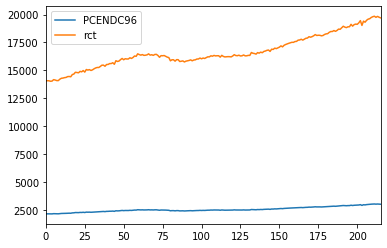

In [7]:
#We need data to be stationary in time series
print(new_consumpt.plot()) ##appears non-stationary

##let's test if stationary using this model
### if pvalue<.05, reject null hypothesis that time series is non-stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(df):
    result=adfuller(df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("time series is stationary")
    else:
        print("time series is non-stationary ")
        
#let's run test
adfuller_test(new_consumpt['PCENDC96'])##as we thought, it is non-stationary
print('\n')
adfuller_test(new_consumpt['rct'])  #also non-stationary

In [8]:
# Must make data stationary

##take difference from first observation to previous observation
new_consumpt['First_Consumpt_Diff'] = new_consumpt.PCENDC96.diff()

new_consumpt['First_Rate_Consumpt_Diff'] = new_consumpt.rct.diff()

print(new_consumpt.head(),'\n')

##fill in nan
new_consumpt = new_consumpt.fillna(0)
print("Updated:\n",new_consumpt.head(),'\n')

##recheck the adfuller test (using differences)
adfuller_test(new_consumpt['First_Consumpt_Diff']) ##now stationary
print('\n')
adfuller_test(new_consumpt['First_Rate_Consumpt_Diff']) ##now stationary

         DATE  PCENDC96           rct  First_Consumpt_Diff  \
0  2002-01-01    2147.4  14062.963842                  NaN   
1  2002-02-01    2148.9  14072.787091                  1.5   
2  2002-03-01    2148.3  14068.857792                 -0.6   
3  2002-04-01    2141.5  14024.325728                 -6.8   
4  2002-05-01    2143.8  14039.388043                  2.3   

   First_Rate_Consumpt_Diff  
0                       NaN  
1                  9.823249  
2                 -3.929300  
3                -44.532064  
4                 15.062316   

Updated:
          DATE  PCENDC96           rct  First_Consumpt_Diff  \
0  2002-01-01    2147.4  14062.963842                  0.0   
1  2002-02-01    2148.9  14072.787091                  1.5   
2  2002-03-01    2148.3  14068.857792                 -0.6   
3  2002-04-01    2141.5  14024.325728                 -6.8   
4  2002-05-01    2143.8  14039.388043                  2.3   

   First_Rate_Consumpt_Diff  
0                  0.000000  
1 

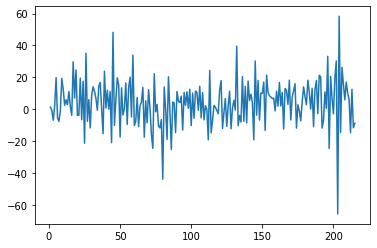

In [9]:
##plot of new consumption data
plt.plot(new_consumpt.PCENDC96.diff())

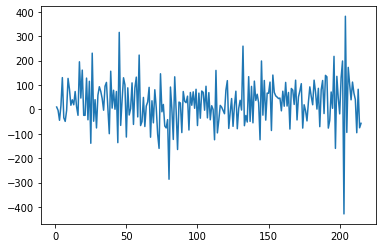

In [10]:
##plot of new consumption data for rate with consumption
plt.plot(new_consumpt.rct.diff())

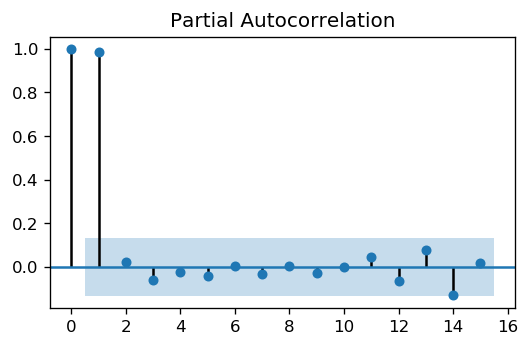

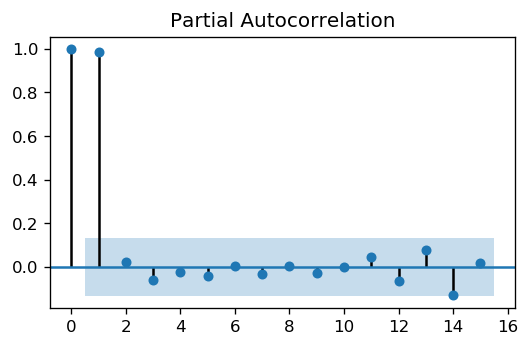

In [11]:
# We will use AR for analysis, must determine number lags 
## use partial autocorrelation to determine lag number 

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})


from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new_consumpt.PCENDC96,lags=15); # we can see there is mostly correlation between the 1st and 2nd lag and not much between the 2nd and 3rd so we only need to use the 1st lag
plot_pacf(new_consumpt.rct,lags=15); #same as above


In [12]:
#prep data for AR
new_consumpt.dtypes
#remove DATE bc object
new_consumpt.drop(['DATE'], axis = 1, inplace = True)
new_consumpt.head()

,PCENDC96,rct,First_Consumpt_Diff,First_Rate_Consumpt_Diff
0,2147.4,14062.963842,0.0,0.000000
1,2148.9,14072.787091,1.5,9.823249
2,2148.3,14068.857792,-0.6,-3.929300
3,2141.5,14024.325728,-6.8,-44.532064
4,2143.8,14039.388043,2.3,15.062316


In [13]:
#AR
#(c_t+1) = b0 + b1(c_t) + b2(c_t)*(r)


##train/test 
train = new_consumpt[:int(0.8*(len(new_consumpt)))] #.int makes things integers, len gets length of array
valid = new_consumpt[int(0.8*(len(new_consumpt))):] #.8 for 80% split train 20% valiation

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR 
#var is good for multivariate ar (we have r*ct so multivariate, although not sure how to fit this in model)

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [14]:
#make final predictions
model = VAR(endog=new_consumpt)
model_fit = model.fit(4)
yhat = model_fit.forecast(model_fit.y, steps=1)

print(yhat) #each number corresponding in order to the column

[[3.01848681e+03 1.97675659e+04 9.88681295e+00 6.47470862e+01]]
